In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('etl_data.csv')

In [3]:
dataset.head()

,loan_limit,pre_approval,loan_type,loan_purpose,line_of_credit,commercial_loan,loan_amount,interest_rate,interest_rate_spread,upfront_charges,...,units,income,credit_type,credit_score,co_borrower_credit_type,application_taken,ltv,deposit_type,status,dti
0,1,0,1,1,0,0,116500,4.3125,0.0000,0.0,...,1,1740.0,1,758,4,1,98.728814,1,1,45.000000
1,1,0,2,1,0,1,206500,4.3125,0.0000,0.0,...,1,4980.0,2,552,1,1,79.362416,1,1,37.369267
2,1,1,1,1,0,0,406500,4.5600,0.2000,595.0,...,1,9480.0,1,834,4,1,80.019685,1,0,46.000000
3,1,0,1,4,0,0,456500,4.2500,0.6810,0.0,...,1,11880.0,1,587,4,2,69.376900,1,0,42.000000
4,1,1,1,1,0,0,696500,4.0000,0.3042,0.0,...,1,10440.0,4,602,1,2,91.886544,1,0,39.000000


#### Loan Limits

In [4]:
conforming_limit_non_performing = dataset[(dataset['loan_limit'] == 1) & (dataset['status'] == 1)]['loan_limit'].count()
conforming_limit_performing = dataset[(dataset['loan_limit'] == 1) & (dataset['status'] == 0)]['loan_limit'].count()
non_conforming_limit_non_performing = dataset[(dataset['loan_limit'] == 2) & (dataset['status'] == 1)]['loan_limit'].count()
non_conforming_limit_performing = dataset[(dataset['loan_limit'] == 2) & (dataset['status'] == 0)]['loan_limit'].count()

conforming_limit_performing, conforming_limit_non_performing, non_conforming_limit_performing, non_conforming_limit_non_performing

(102904, 32444, 6664, 3314)

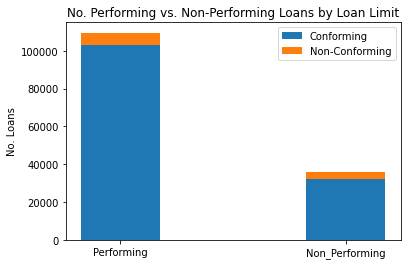

In [5]:
labels = ['Performing', 'Non_Performing']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, [conforming_limit_performing, conforming_limit_non_performing], width, label='Conforming')
ax.bar(labels, [non_conforming_limit_performing, non_conforming_limit_non_performing], width, bottom=[conforming_limit_performing, conforming_limit_non_performing], label='Non-Conforming')

ax.set_ylabel('No. Loans')
ax.set_title('No. Performing vs. Non-Performing Loans by Loan Limit')
ax.legend()

plt.show()

### Loan amount

In [6]:
dataset['loan_amount_mm'] = dataset['loan_amount'] / 1_000_000

In [28]:
dataset['Loan Status'] = dataset['status'].map({1: 'Non-Performing', 0: 'Performing'})

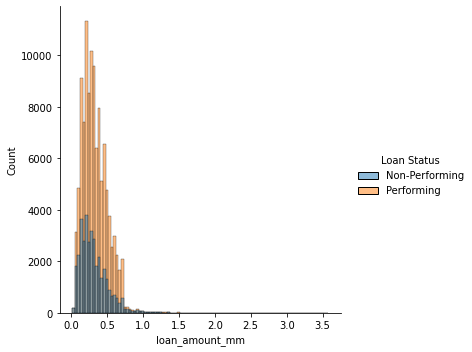

In [29]:
sns.displot(dataset, x="loan_amount_mm", hue="Loan Status", bins=100)

#### Credit Score

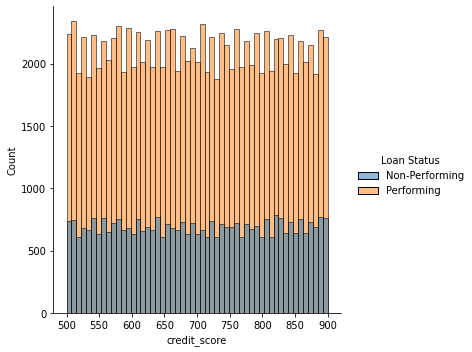

In [51]:
sns.displot(dataset, x="credit_score", hue="Loan Status")

#### Income

In [ ]:
sns.displot(da)